In [37]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

sns.set_theme()

In [2]:
sales = pd.read_csv('sales_train_v2.csv')
sales59 = sales[sales.shop_id == 59]
sales59.date = pd.to_datetime(sales59.date, dayfirst=True)
sales59.set_index('date', inplace=True)
sales59 = sales59.drop(columns=['date_block_num', 'item_id'])
sales59['income'] = sales59['item_price'] * sales59['item_cnt_day']

sales_59 = sales59[sales59.index.year == 2013]

sales_59 = sales_59[sales_59.index.month < 11]
sales_59_historic = sales_59[sales_59.index.month < 10]
sales_59_to_predict = sales_59[sales_59.index.month == 10]
sales_59_historic = sales_59.sort_values(by= 'date')
sales_59_to_predict = sales_59_to_predict.sort_values(by= 'date')

sales_59_historic['INC'] = sales_59_historic.income.cumsum()

C:\Users\and_b\AppData\Local\Temp\ipykernel_20880\613378448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales59.date = pd.to_datetime(sales59.date, dayfirst=True)


In [3]:
sales_59_historic['date'] = sales_59_historic.index

<Axes: xlabel='date', ylabel='INC'>

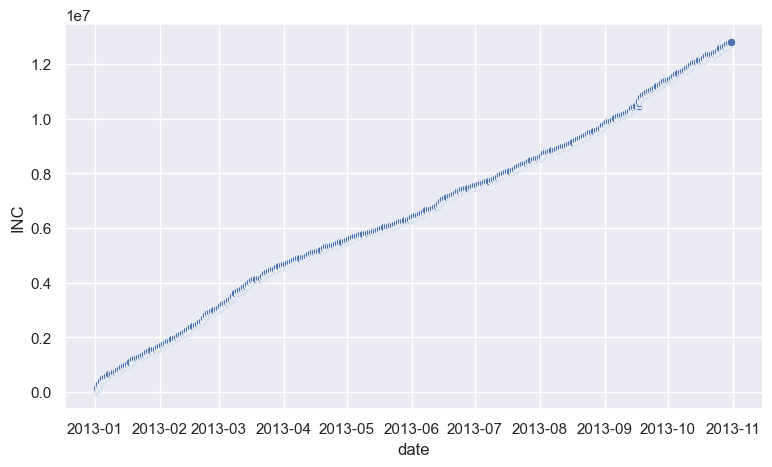

In [11]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=sales_59_historic, x='date', y='INC')

In [ ]:
LR = LinearRegression().fit(np.arange(272).reshape(-1, 1),sales_59_historic.INC.resample('1D').agg('last').values.reshape(-1, 1))

In [ ]:
day = 272 + 31
prediction = LR.predict([[day]])

In [ ]:
prediction

In [25]:
X, y = load_iris(return_X_y=True)

In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
iris = pd.DataFrame({'f1': X[:,0],
                    'f2': X[:,1],
                    'f3': X[:,2],
                    'f4': X[:,3],
                    'target': y})

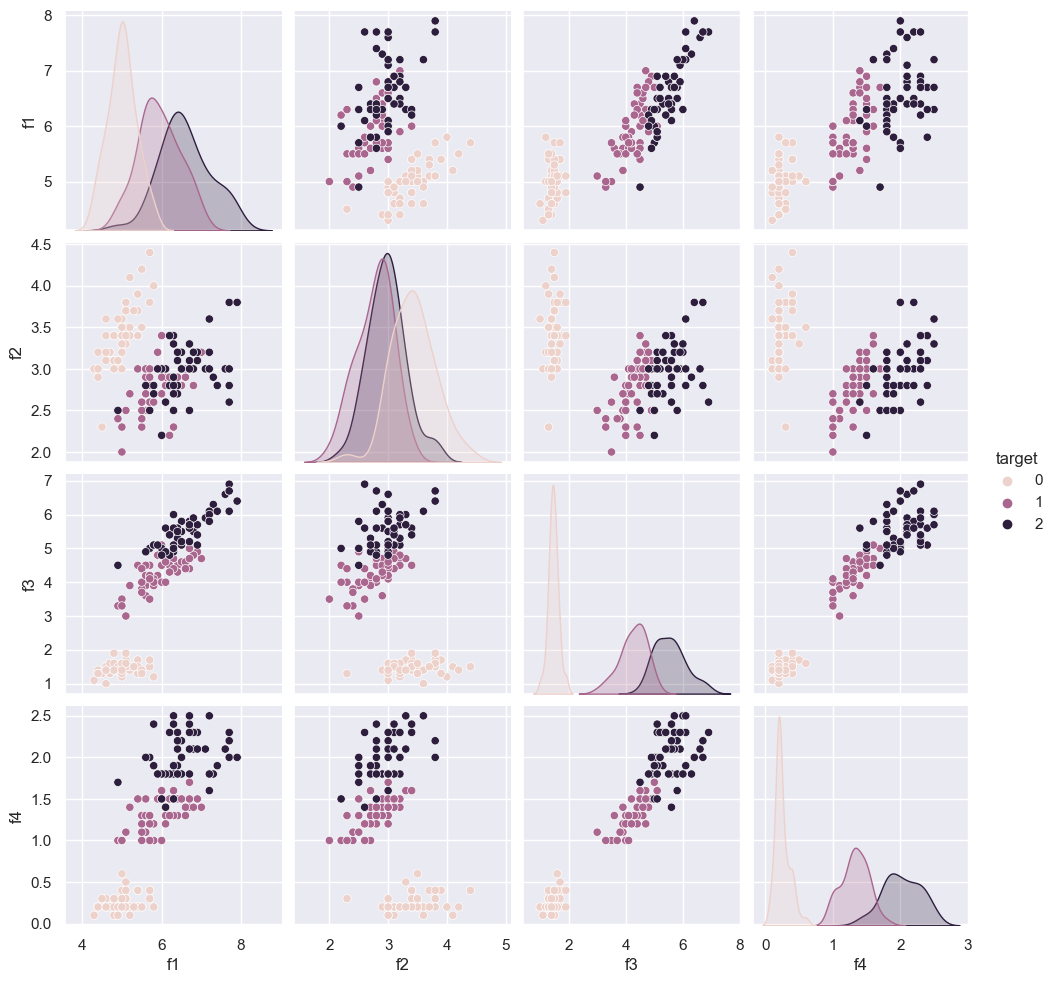

In [28]:
sns.pairplot(data= iris, hue= 'target')

In [29]:
lr = LogisticRegression().fit(X, y)

c:\Users\and_b\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
lr.predict_proba(X)

array([[9.81814208e-01, 1.81857775e-02, 1.43917279e-08],
       [9.71753449e-01, 2.82465214e-02, 3.00994334e-08],
       [9.85462591e-01, 1.45373964e-02, 1.22993185e-08],
       [9.76311623e-01, 2.36883373e-02, 3.96442936e-08],
       [9.85396524e-01, 1.46034641e-02, 1.19164004e-08],
       [9.70481251e-01, 2.95186753e-02, 7.33580361e-08],
       [9.86898094e-01, 1.31018860e-02, 1.99396387e-08],
       [9.76417425e-01, 2.35825477e-02, 2.75681912e-08],
       [9.79859289e-01, 2.01406804e-02, 3.06300428e-08],
       [9.69156672e-01, 3.08432964e-02, 3.15784260e-08],
       [9.76522762e-01, 2.34772191e-02, 1.91705975e-08],
       [9.75422170e-01, 2.45777862e-02, 4.37627830e-08],
       [9.74581838e-01, 2.54181401e-02, 2.14377666e-08],
       [9.91980309e-01, 8.01968673e-03, 3.88661128e-09],
       [9.88216224e-01, 1.17837731e-02, 2.79897619e-09],
       [9.86782260e-01, 1.32177269e-02, 1.27555799e-08],
       [9.88127692e-01, 1.18722989e-02, 9.17539651e-09],
       [9.81571817e-01, 1.84281

<Axes: ylabel='Count'>

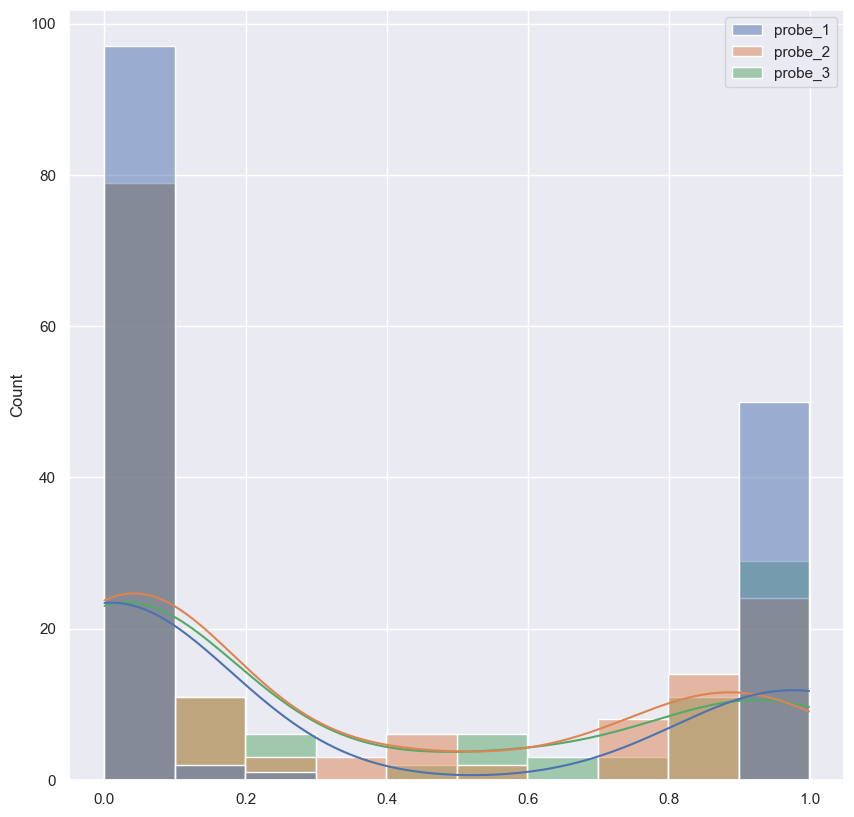

In [31]:
plt.figure(figsize=(10, 10))

ans = lr.predict_proba(X)
sures = pd.DataFrame({'probe_1': ans[:,0], 'probe_2': ans[:, 1], 'probe_3': ans[:, 2]})
sns.histplot(data= sures, kde=True)

<Axes: ylabel='Density'>

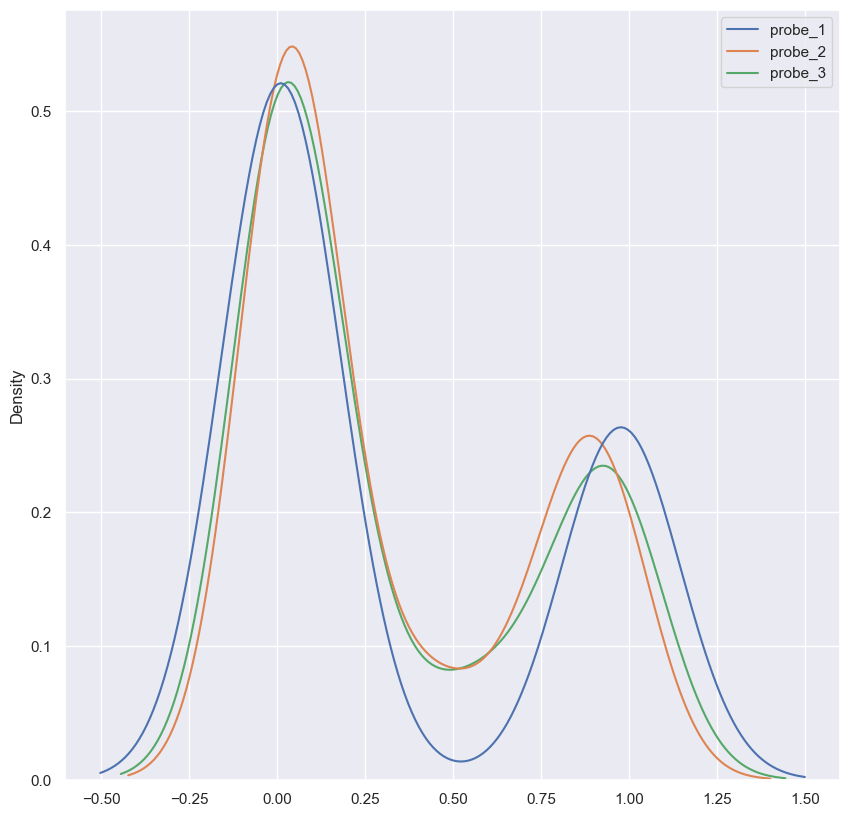

In [32]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data= sures)

In [34]:
#-------------------------------- решающие деревья --------------------------------

clf = DecisionTreeClassifier(random_state=0)

In [35]:
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [36]:
clf = DecisionTreeClassifier().fit(X, y)

In [38]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



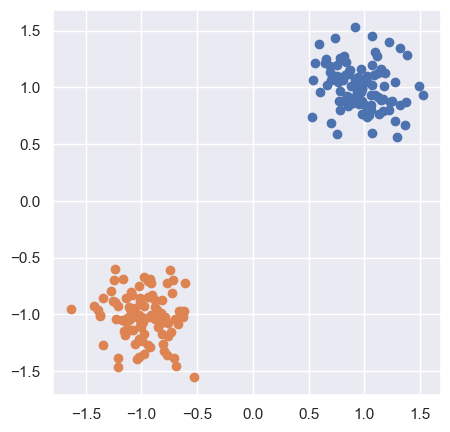

In [43]:
class_1 = np.random.randn(100, 2)*0.2 + np.array([1, 1])
class_2 = np.random.randn(100, 2)*0.2 - np.array([1, 1])

plt.figure(figsize=(5, 5))
plt.scatter(class_1[:, 0], class_1[:, 1])
plt.scatter(class_2[:, 0], class_2[:, 1])

In [44]:
X = np.concatenate([class_1, class_2])
y = np.array([0 if i<100 else 1 for i in range(200)])

In [45]:
lr = LogisticRegression().fit(X, y)
clf = DecisionTreeClassifier().fit(X, y)

In [46]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= -0.02
|   |--- class: 1
|--- feature_1 >  -0.02
|   |--- class: 0



In [47]:
x_ = np.linspace([-2, -2], [2, 2], 100)
y_ = lr.coef_[0][0]*x_ + lr.coef_[0][1]

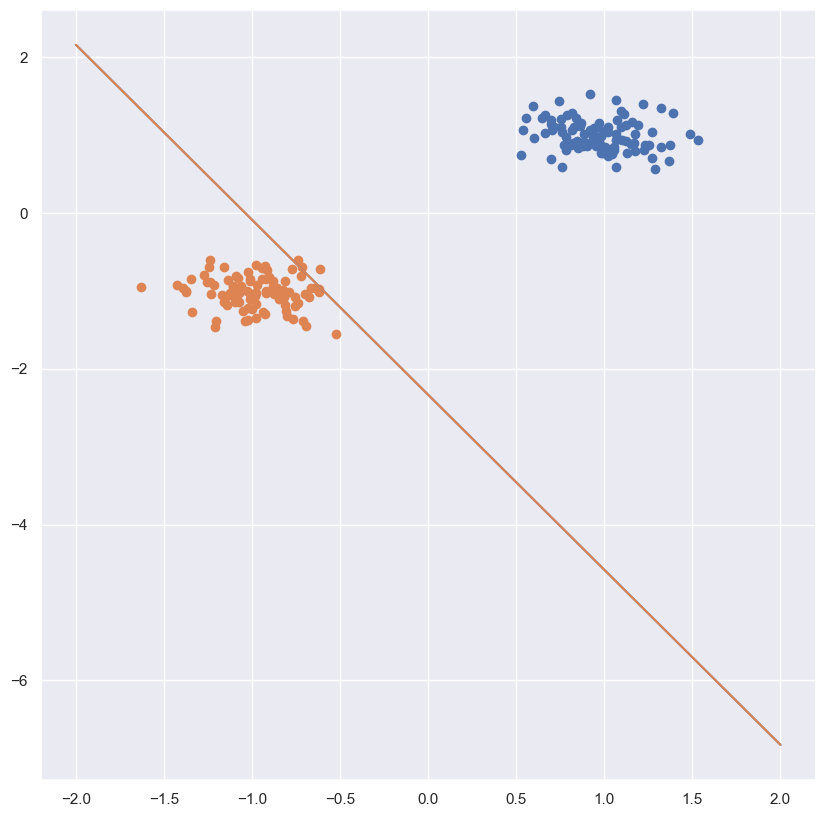

In [49]:
plt.figure(figsize=(10, 10))
plt.scatter(class_1[:, 0], class_1[:, 1])
plt.scatter(class_2[:, 0], class_2[:, 1])
plt.plot(x_, y_)
plt.plot([-2, -2], [0.09, 0.09])